In [1]:
#This project is a complete analysis of data sets gotten from an online movie channel.

In [2]:
# First, i have to import the packages i will be using in this project
# I like to import all libraries and functions as i begin the project.

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

#I have to import the data set 
df = pd.read_csv(r'C:\Users\ADORABELLA\Downloads\movies.csv')


In [ ]:
#Looking at the entire file

In [ ]:
df.head()

In [ ]:
#Looking at the first few rows and columns of the dataset

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [ ]:
#First, i will be doing some cleaning on the data.
#To begin, I will be checking for any missing data sets.
#To do this, i will be looping through the data to see if there is anything missing

In [4]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [ ]:
#To drop rows with missing data
df = df.dropna()
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

In [5]:
# To know the Data Types for the columns in this data

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [ ]:
#Notice that the Budget and gross column data type is a float
#I would like it to be an interger hence i am converting from a float to an interger.

df['budget'] = df['budget'].astype('Int64')
df['gross'] = df['gross'].astype('Int64')

In [ ]:
#To check for the data type update
df.head()

In [ ]:
#Looking through the data set, i find that the year and release date
#which are supposed to be in sync are infact not actually in sync  across all rows.
# To fix this, i have decided to introduce a new 'year column'
#which will be taking the first four values of the release date column

In [ ]:
#Creating the correct year column
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)
df


In [ ]:
#To check for any Outliers?

df.boxplot(column=['gross'])

In [ ]:
#To order the data
df.sort_values(by=['gross'], inplace=False, ascending=False)

In [ ]:
#Notice that i cannot actually scrow down below the firt few rows of data
#To fix this i have to import some pandas functions
pd.set_option('display.max_rows',None)

In [ ]:
#Calling the data set again to confirm all rows can be viewed with ease
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [ ]:
#To get all duplicate values in the dataset to futher verify duplicate values
df['company'].sort_values(ascending=False)

In [ ]:
#I Have to drop all duplicate values
#dropping duplicate values
df['company'].drop_duplicates().sort_values(ascending=False)

In [ ]:
#If i actually wanted to drop all duplicates Across the entire dataframe
#df.drop_duplicates()

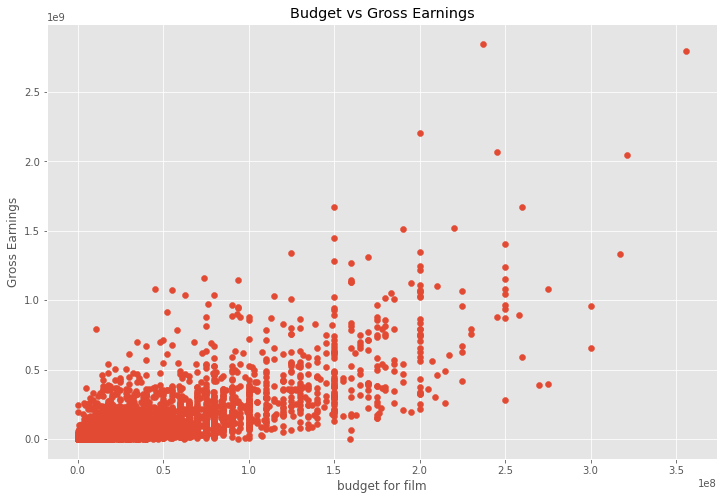

In [7]:
#Since i am looking at data with high correlation tendencies
#I will build a scatter plot chart to measure the correlation 
#between budget and gross revenue.

plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('budget for film')
plt.ylabel('Gross Earnings')
plt.show()

In [ ]:
df.head()

In [ ]:
#I am also using other seaborn functions for the same graph for further analysis
sns.stripplot(x='budget',y='gross',data=df)


In [8]:
#To ascertain the actual correlation which works mainly on numeric fields and not strings
#Using the different correlation methods which include
#1-pearson,2-kendall,3-spearman.
df.corr(method="pearson")


,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


In [9]:
df.corr(method="kendall")

,year,score,votes,budget,gross,runtime
year,1.000000,0.067652,0.331465,0.224120,0.200618,0.097184
score,0.067652,1.000000,0.300115,-0.000566,0.086046,0.283611
votes,0.331465,0.300115,1.000000,0.353702,0.548899,0.198240
budget,0.224120,-0.000566,0.353702,1.000000,0.512637,0.235483
gross,0.200618,0.086046,0.548899,0.512637,1.000000,0.168933
runtime,0.097184,0.283611,0.198240,0.235483,0.168933,1.000000


In [10]:
df.corr(method="spearman")

,year,score,votes,budget,gross,runtime
year,1.000000,0.099045,0.469829,0.317336,0.293084,0.142977
score,0.099045,1.000000,0.428138,-0.001403,0.126116,0.399857
votes,0.469829,0.428138,1.000000,0.502466,0.742050,0.290159
budget,0.317336,-0.001403,0.502466,1.000000,0.693670,0.336370
gross,0.293084,0.126116,0.742050,0.693670,1.000000,0.246243
runtime,0.142977,0.399857,0.290159,0.336370,0.246243,1.000000


In [ ]:
#I will be using the default method which is pearson
#Notice the high correlation between budget and gross
#I need to visualize the correlation matrix 
correlation_matrix = df.corr(method="pearson")
sns.heatmap(correlation_matrix,annot=True)
plt.show()

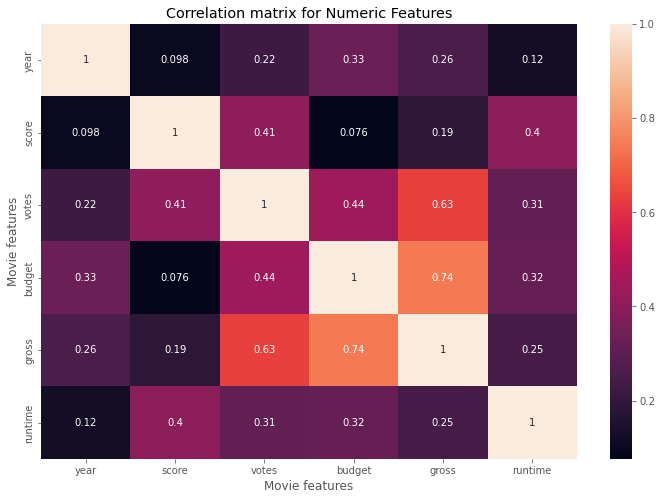

In [11]:
#Naming my correlation matrix with title and axis

correlation_matrix = df.corr(method="pearson")

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [ ]:
#I will now be looking at the company data
df.head()

In [ ]:
#I will get numeric representations of the data so that i can easily correlate them with the matrix

df_numerised = df

for col_name in df_numerised.columns:
    if(df_numerised[col_name].dtype=='object'):
        df_numerised[col_name] = df_numerised[col_name].astype('category')
        df_numerised[col_name] = df_numerised[col_name].cat.codes
        
df_numerised.head()

In [ ]:
#Notice that all object data types have turned into figures.
#I could say in my own terms they have been numerised...
#Let me compare the dataframe with the numerised_data
df.head()

In [ ]:
#To get my df_numerised correlation matrix with title and axis

correlation_matrix = df_numerised.corr(method="pearson")

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [ ]:
#df_numerised correlation visual above looks complicated
#Let me break it down to a less complicated visual
#Lets look at the df_numerised correlation again

df_numerised.corr()

In [ ]:
#I want to organise this data such that i can see the highest correlations easily
#I will be using the "unstack" function
correlation_mat = df_numerised.corr()
corr_pairs = correlation_mat.unstack
corr_pairs

In [ ]:
#preferably, I can also use


In [ ]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

In [ ]:
#To also see highest correlation pairs at a quicker view
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

In [ ]:
#I want to specifically view high correlations > 0.5
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

In [ ]:
# prefarably, I can now take a look at the ones that have a high correlation (> 0.5) using

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

In [12]:
#Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 56491421806
Universal Pictures           52514188890
Columbia Pictures            43008941346
Paramount Pictures           40493607415
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9230230105
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

In [ ]:
#Getting the correct release year
df['Year'] = df['released'].astype(str).str[:4]
df

In [ ]:
df.groupby(['company', 'year'])[["gross"]].sum()

In [ ]:
CompanyGrossSum = df.groupby(['company'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

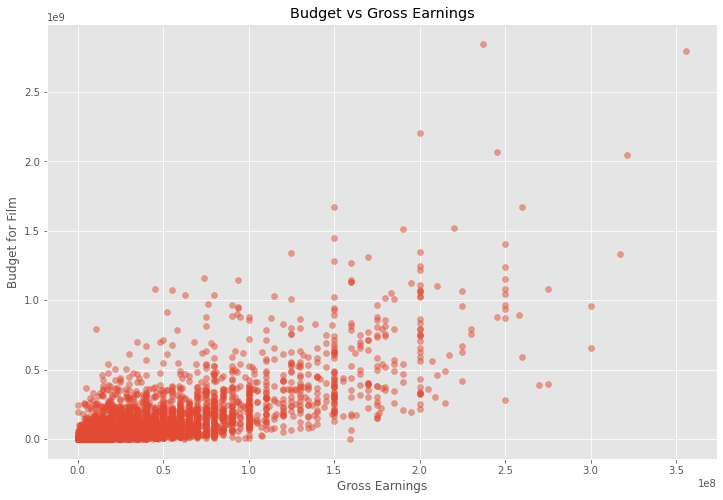

In [13]:
plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

C:\Users\ADORABELLA\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 94.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ADORABELLA\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 83.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ADORABELLA\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 45.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ADORABELLA\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 79.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ADORABELLA\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWar

<AxesSubplot:xlabel='rating', ylabel='gross'>

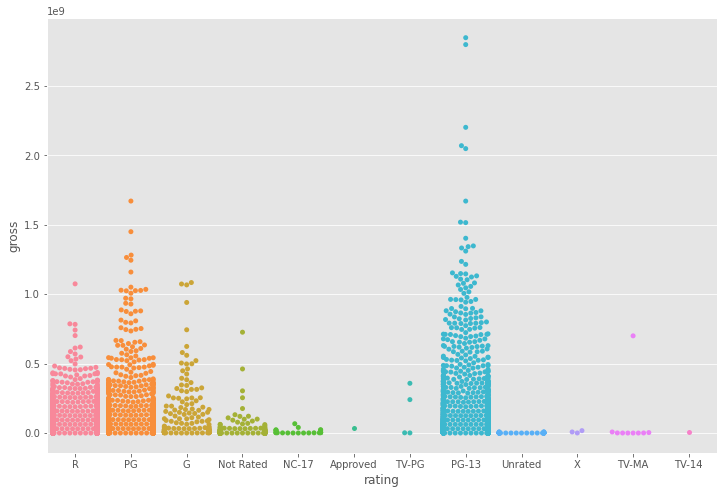

In [14]:
sns.swarmplot(x="rating", y="gross", data=df)

<AxesSubplot:xlabel='rating', ylabel='gross'>

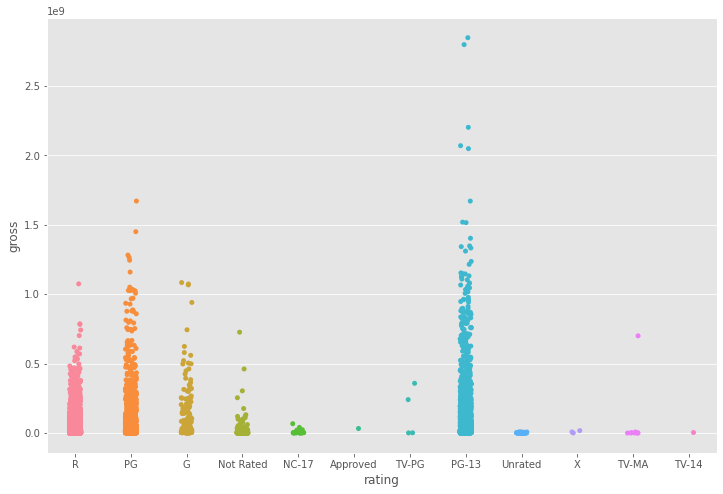

In [15]:
sns.stripplot(x="rating", y="gross", data=df)